<center><h1>Problem description and Data Understanding </h1></center>

<h2> Introduction</h2>

In this notebook focus on the **Problem Description** and the **Data Understanding** stages.

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
1. [Problem Description]<br>
2. [Data Understanding ]<br>
</div>
<hr>

In [3]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

<h1> Problem Description</h1>


<h3> Collisions</h3>
<p>A collision is the event in which two or more bodies exert forces on each other in about a relatively short time. Although the most common use of the word collision refers to incidents in which two or more objects collide with great force, the scientific use of the term implies nothing about the magnitude of the force.</p><br>
The topic is:
 <h3>Trafic Collisions - All years</h3><br>
 A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.
<p>All collisions provided by SPD and recorded by Traffic Records. </p>



 This includes all types of collisions address.
 
  
  
 <ul><li>Alley </li>
    <li> Block</li>
    <li> Intersection</li>
</ul>
 

<h1> Data Understanding</h1>

In [7]:
#read the data

df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print("Data read into dataframe!") 

Data read into dataframe!


In [8]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
#shape of the data
df.shape

(194673, 38)

In [10]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [11]:
#describe the data
df.describe

<bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
5                  1 -122.387598  47.690575         6  320840     322340   
6                  1 -122.338485  47.618534         7   83300      83300   
7                  2 -122.320780  47.614076         9  330897     332397   
8                  1 -122.335930  47.611904        10   63400      63400   
9                  2 -122.384700  47.528475        12   58600      58600   
10                 1         NaN        NaN        14   48900      48900   
11                 1 -122.333831  47.547371        15 

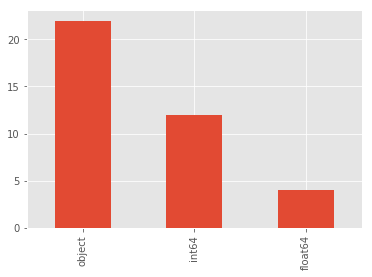

In [12]:
df.dtypes.value_counts().plot(kind='bar')

In [13]:
Null_values = df.isnull().sum()
Null_values[0:38]

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

I know to handle the missing values, the best case remove the which columns are many missing values. 
<ul><li>INTKEY</li>
    <li>EXCEPTRSNCODE</li>
    <li>EXCEPTRSNDESC</li>
    <li>INATTENTIONIND</li>
    <li>PEDROWNOTGRNT</li>
    <li>SDOTCOLNUM</li>
    <li>SPEEDING</li></ul>